# Use Case Summary

## Objective Statement
* To get insight how many customers that churn and not churn.
* To get insight whether customers that churn and not churn based on gender, senior citizen, have partner and dependents.
* To get insight whether customers that churn and not churn based on how many customers use the services provided such as 
contract, phone service, multiple lines, internet service, online security, online backup, device protection, tech support, streaming tv, streaming movies, paperless billing and payment method.
* To get insight whether customers that churn and not churn based on how many spending their money every month and total spending
* To get insight whether customers that churn and not churn based on how long their tenure.
* Create modeling using Machine Learning to predict customers churn.

## Challenges
* Large size of data, can not be maintained by excel spreadsheet.
* Dataset have missing values and incorrect data type.
* Don't understand the data stored in each column with the column name.

## Methodology / Analytic Technique
* Descriptive Analysis: to find out information on current conditions based on the data that has been collected.
* Graph Analysis: provide information from the graph.
* Modelling : Machine Learning Classification.

## Business Benefit
* Know how to treat customers based on their behavior.
* Help the business team provide products or services based on the behavior of each customer.

## Expected Outcome
* Know how many customers that churn and not churn. 
* Know how many customers that churn and not churn based on gender, senior citizen, have partner and dependents.
* Know how many customers that churn and not churn based on contract, phone service, multiple lines, internet service, online security, online backup, device protection, tech support, streaming tv, streaming movies, paperless billing and payment method.
* Know how many customers that churn and not churn based on spending their money every month and total spending.
* Know how long customers that churn and not churn based on ong their tenure.
* Create modeling using Machine Learning to predict customers churn.



<HR>

# Business Understanding
Telco Company is a company engaged in the information technology services, communications and telecommunications networks. Customer churn in telco company is one of the biggest problems in a company. Why? Because the cost of acquiring a new customer is way more expensive than retaining an existing one. Thus in this project has some business questions using the data telco :
* How many customers that churn and not churn ?
* How many customers that churn and not churn based on gender, senior citizen, have partner and dependents ?
* How many customers that churn and not churn based on contract, phone service, multiple lines, internet service, online security, online backup, device protection, tech support, streaming tv, streaming movies, paperless billing and payment method ?
* How many customers that churn and not churn based on spending their money every month and total spending ?
* How long customers that churn and not churn based on their tenure ?
* How produce modeling using Machine Learning to predict customers churn ?

<hr>

# Data Understanding

## Source Data
Telco Customer Churn by International Business Machines Corporation (IBM) Sample Data Sets. <br>
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Data Dictionary
The dataset has 21 columns and 7043 rows.

**Demographic Information**
* customerID : Unique number for each customers. 
* gender : Whether the client is a female or a male (Female, Male).
* SeniorCitizen : Whether the client is a senior citizen or not (0, 1).
* Partner : Whether the client has a partner or not (Yes, No). 
* Dependents : Whether the client has dependents or not (Yes, No). 
* Churn : Whether the customer churned or not (Yes, No). 

**Customer Account Information**
* tenure : Number of months the customer has stayed with the company (Multiple different numeric values). 
* Contract : Indicates the customers current contract type (Month-to-Month, One year, Two year). 
* PaperlessBilling : Whether the client has paperless billing or not (Yes, No). 
* PaymentMethod : The customers payment method (Electronic check, Mailed check, * Bank transfer (automatic), Credit Card (automatic)). 
* MonthlyCharges : The amount charged to the customer monthly (Multiple different numeric values). 
* TotalChargess : The total amount charged to the customer (Multiple different numeric values). 

**Services Information**
* PhoneService : Whether the client has a phone service or not (Yes, No). 
* MultipleLines : Whether the client has multiple lines or not (No phone service, No, Yes). 
* InternetService : Whether the client is subscribed to Internet service with the company (DSL, Fiber, optic, No). 
* OnlineSecurity : Whether the client has online security or not (No internet service, No, Yes). 
* OnlineBackup : Whether the client has online backup or not (No internet service, No, Yes). 
* DeviceProtection : Whether the client has device protection or not (No internet service, No, Yes). 
* TechSupport : Whether the client has tech support or not (No internet service, No, Yes). 
* StreamingTV : Whether the client has streaming TV or not (No internet service, No, Yes). 
* StreamingMovies : Whether the client has streaming movies or not (No internet service, No, Yes). 

<hr>

# Data Preparation
* Programming Language : Python Version 3.9.12 
* Libraries : Pandas, Numpy, Matplotlib, Seaborn, Sklearn, Imblearn

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, log_loss
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

### Data Profiling

In [ ]:
df_telco = pd.read_csv('data_telco.csv')

df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   6034 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       6034 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_telco.isnull().sum()

customerID             0
gender              1009
SeniorCitizen       1009
Partner             1009
Dependents          1009
tenure                 0
PhoneService           0
MultipleLines       1009
InternetService     1009
OnlineSecurity      1009
OnlineBackup        1009
DeviceProtection    1009
TechSupport         1009
StreamingTV         1009
StreamingMovies     1009
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

<hr>

# Data Cleaning

In [ ]:
# Handle missing value in data categorical
df_telco['gender'] = df_telco.gender.fillna("Unknown")
df_telco['SeniorCitizen'] = df_telco.SeniorCitizen.fillna("Unknown")
df_telco['Partner'] = df_telco.Partner.fillna("Unknown")
df_telco['Dependents'] = df_telco.Dependents.fillna("Unknown")
df_telco['MultipleLines'] = df_telco.MultipleLines.fillna("Unknown")
df_telco['InternetService'] = df_telco.InternetService.fillna("Unknown")
df_telco['OnlineSecurity'] = df_telco.OnlineSecurity.fillna("Unknown")
df_telco['OnlineBackup'] = df_telco.OnlineBackup.fillna("Unknown")
df_telco['DeviceProtection'] = df_telco.DeviceProtection.fillna("Unknown")
df_telco['TechSupport'] = df_telco.TechSupport.fillna("Unknown")
df_telco['StreamingTV'] = df_telco.StreamingTV.fillna("Unknown")
df_telco['StreamingMovies'] = df_telco.StreamingMovies.fillna("Unknown")

In [ ]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert data type object to float
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')

In [ ]:
df_telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

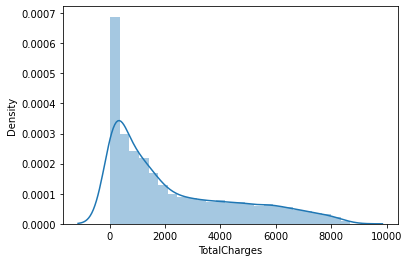

In [ ]:
# sns.set_style('whitegrid')
sns.distplot(df_telco['TotalCharges']);

In [ ]:
# Handle missing value in numeric
val_med = df_telco['TotalCharges'].median()
df_telco['TotalCharges'] = df_telco['TotalCharges'].fillna(val_med)

In [ ]:
# drop customerID -> identifier
df_telco.drop(['customerID'], axis=1, inplace=True)

In [ ]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


* There are 14% row data that are null. Where data is null in the Gender, SeniorCitizen, Partner, Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies columns. All of these columns store categorical data so to handle it by filling in the empty rows with unknown label.
* Changed the data type from object to float in the TotalCharges column. There are 11 empty rows after changing the data type. To handle it must fill in the null rows with the median from the Total Charges column.
* Delete the customer id column because it is an identifier.





---



# Exploratory Data Analysis

In [ ]:
df_telco.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


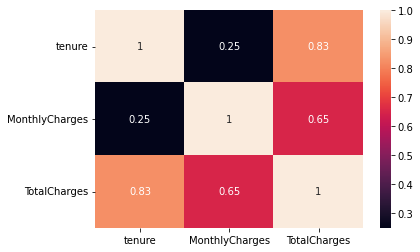

In [ ]:
# correlation
plt.figure(figsize = (6,4))
sns.heatmap(df_telco.corr(), annot=True);

#### Know how many customers that churn and not churn.

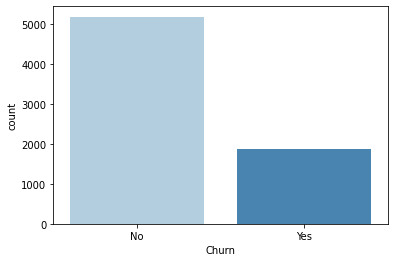

In [ ]:
# Churn
sns.countplot(x='Churn', data=df_telco, palette='Blues');

In [ ]:
df_telco['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* From the chart above, can be seen that most customers are non-churn
* From 7043 customers, 73.4% are non-churn with 5174 customer and 26.6% are churn with 1869 customer.


#### Know how many customers that churn and not churn based on gender, senior citizen, have partner and dependents.

         gender  Percent  Churn  Churn %  Not Churn  Not Churn %
Male       3041     43.2    802     43.1       2239         43.3
Female     2993     42.5    806     42.9       2187         42.3
Unknown    1009     14.3    261     14.0        748         14.5


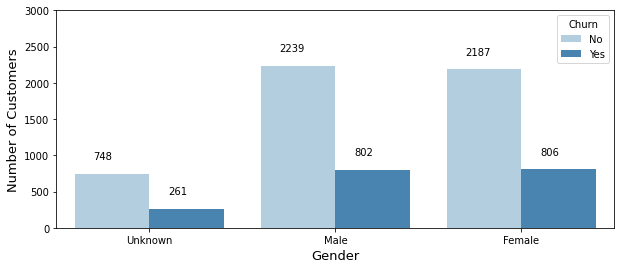

In [ ]:
# Gender
df_Gender = pd.DataFrame(df_telco['gender'].value_counts())
df_Gender['Percent'] = [round(i*100/sum(df_Gender.gender), 1) for i in df_Gender.gender]

df_Gender_churn = pd.DataFrame(df_telco.gender[(df_telco['Churn'] == 'Yes')].value_counts())
df_Gender['Churn'] = df_Gender_churn.gender
df_Gender['Churn %'] = [round(i*100/sum(df_Gender_churn.gender), 1) for i in df_Gender_churn.gender]

df_Gender_notChurn = pd.DataFrame(df_telco.gender[(df_telco['Churn'] == 'No')].value_counts())
df_Gender['Not Churn'] = df_Gender_notChurn.gender
df_Gender['Not Churn %'] = [round(i*100/sum(df_Gender_notChurn.gender), 1) for i in df_Gender_notChurn.gender]

print(df_Gender)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='gender', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 3000)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, can be seen that most customers by gender are male.
* From 7043 customers, 43.2% are male, 42.5% are female and 14.3% are customers who are not known male or female.
* For customers who churn by gender for male 43.1%, female 42.9% and unknown gender the customer 14%.
* Then for customers who not churn by gender, 43.3% are male, 42.3% female and the unknown gender the customers 14%.

         SeniorCitizen  Percent  Churn  Churn %  Not Churn  Not Churn %
0.0               5057     71.8   1197     64.0       3860         74.6
Unknown           1009     14.3    261     22.0        748         14.5
1.0                977     13.9    411     14.0        566         10.9


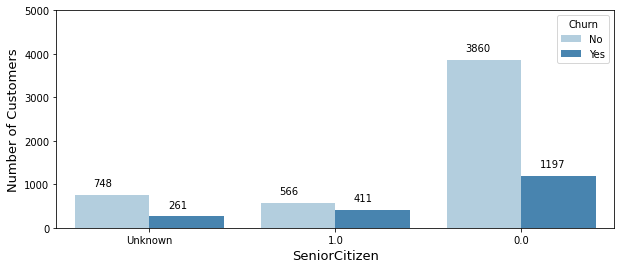

In [ ]:
# SeniorCitizen
df_SeniorCitizen = pd.DataFrame(df_telco['SeniorCitizen'].value_counts())
df_SeniorCitizen['Percent'] = [round(i*100/sum(df_SeniorCitizen.SeniorCitizen), 1) for i in df_SeniorCitizen.SeniorCitizen]

df_SeniorCitizen_churn = pd.DataFrame(df_telco.SeniorCitizen[(df_telco['Churn'] == 'Yes')].value_counts())
df_SeniorCitizen['Churn'] = df_SeniorCitizen_churn.SeniorCitizen
df_SeniorCitizen['Churn %'] = [round(i*100/sum(df_SeniorCitizen_churn.SeniorCitizen), 1) for i in df_SeniorCitizen_churn.SeniorCitizen]

df_SeniorCitizen_notChurn = pd.DataFrame(df_telco.SeniorCitizen[(df_telco['Churn'] == 'No')].value_counts())
df_SeniorCitizen['Not Churn'] = df_SeniorCitizen_notChurn.SeniorCitizen
df_SeniorCitizen['Not Churn %'] = [round(i*100/sum(df_SeniorCitizen_notChurn.SeniorCitizen), 1) for i in df_SeniorCitizen_notChurn.SeniorCitizen]

print(df_SeniorCitizen)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('SeniorCitizen', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 5000)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above It can be seen that non-churn customers are dominated by non-senior citizens with 74.6% and 26.4% senior citizens. 
* From 7K customers, about 71..8%  are not senior citizens, around 13.9% customers are senior citizens and 14.3% is not known whether they are senior citizens or not.
* The total churn of not senior citizens is only around 1.1K or 16.9% of  customers, but the total churn from senior citizens is almost half of the total senior citizens.


         Partner  Percent  Churn  Churn %  Not Churn  Not Churn %
No          3111     44.2   1032     55.2       2079         45.4
Yes         2923     41.5    576     30.8       2347         40.2
Unknown     1009     14.3    261     14.0        748         14.5


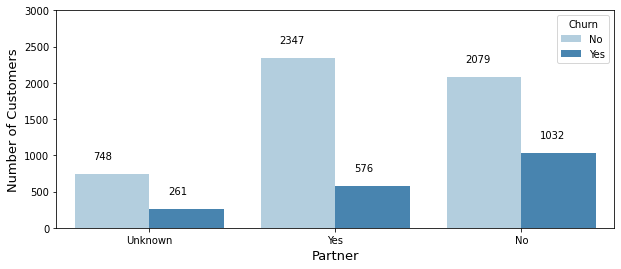

In [ ]:
# Partner
df_Partner = pd.DataFrame(df_telco['Partner'].value_counts())
df_Partner['Percent'] = [round(i*100/sum(df_Partner.Partner), 1) for i in df_Partner.Partner]

df_Partner_churn = pd.DataFrame(df_telco.Partner[(df_telco['Churn'] == 'Yes')].value_counts())
df_Partner['Churn'] = df_Partner_churn.Partner
df_Partner['Churn %'] = [round(i*100/sum(df_Partner_churn.Partner), 1) for i in df_Partner_churn.Partner]

df_Partner_notChurn = pd.DataFrame(df_telco.Partner[(df_telco['Churn'] == 'No')].value_counts())
df_Partner['Not Churn'] = df_Partner_notChurn.Partner
df_Partner['Not Churn %'] = [round(i*100/sum(df_Partner_notChurn.Partner), 1) for i in df_Partner_notChurn.Partner]

print(df_Partner)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='Partner', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Partner', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 3000)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* It can be seen that churn customers are 55.2% of customers who do not have partners. 
* Meanwhile customers who have partners, the total customers who churn only around 576 from 7K, or 8.17% of total customers .
* Likewise with unknown customers whether having partner or not, which is only around 14% customers that churn from around 1K total unknown customers.


         Dependents  Percent  Churn  Churn %  Not Churn  Not Churn %
No             4238     60.2   1326     70.9       2912         56.3
Yes            1796     25.5    282     15.1       1514         29.3
Unknown        1009     14.3    261     14.0        748         14.5


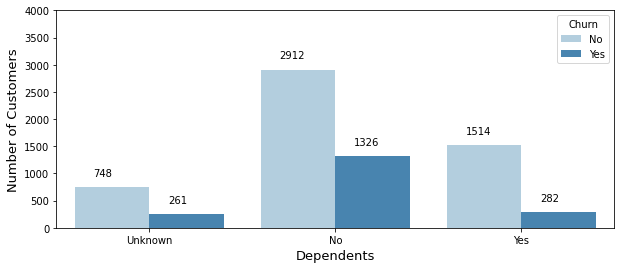

In [ ]:
# Dependents
df_Dependents = pd.DataFrame(df_telco['Dependents'].value_counts())
df_Dependents['Percent'] = [round(i*100/sum(df_Dependents.Dependents), 1) for i in df_Dependents.Dependents]

df_Dependents_churn = pd.DataFrame(df_telco.Dependents[(df_telco['Churn'] == 'Yes')].value_counts())
df_Dependents['Churn'] = df_Dependents_churn.Dependents
df_Dependents['Churn %'] = [round(i*100/sum(df_Dependents_churn.Dependents), 1) for i in df_Dependents_churn.Dependents]

df_Dependents_notChurn = pd.DataFrame(df_telco.Dependents[(df_telco['Churn'] == 'No')].value_counts())
df_Dependents['Not Churn'] = df_Dependents_notChurn.Dependents
df_Dependents['Not Churn %'] = [round(i*100/sum(df_Dependents_notChurn.Dependents), 1) for i in df_Dependents_notChurn.Dependents]

print(df_Dependents)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='Dependents', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Dependents', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 4000)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, can be seen that most customers are not dependents with 60.2%, 25.5% dependents and 14.3% are unknown..
* For customers who are churn by dependents  are70.9% not dependents, 15.1 % are dependents  and 14% are unknown whether dependents or not.
* For customers who are not churn by dependents  are 56.3% not dependents, 29.3 % are dependents  and 14.5% are unknown whether dependents or not.


#### Know how many customers that churn and not churn based on contract, phone service, multiple lines, internet service, online security, online backup, device protection, tech support, streaming tv, streaming movies, paperless billing and payment method.



     PhoneService  Percent  Churn  Churn %  Not Churn  Not Churn %
Yes          6361     90.3   1699     90.9       4662         90.1
No            682      9.7    170      9.1        512          9.9


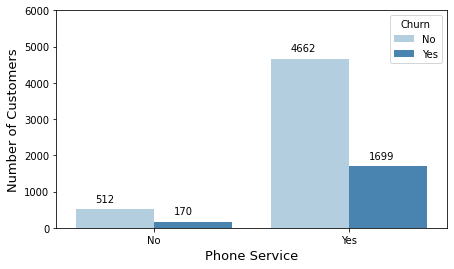

In [ ]:
# Phone Service
df_PhoneService = pd.DataFrame(df_telco['PhoneService'].value_counts())
df_PhoneService['Percent'] = [round(i*100/sum(df_PhoneService.PhoneService), 1) for i in df_PhoneService.PhoneService]

df_PhoneService_churn = pd.DataFrame(df_telco.PhoneService[(df_telco['Churn'] == 'Yes')].value_counts())
df_PhoneService['Churn'] = df_PhoneService_churn.PhoneService
df_PhoneService['Churn %'] = [round(i*100/sum(df_PhoneService_churn.PhoneService), 1) for i in df_PhoneService_churn.PhoneService]

df_PhoneService_notChurn = pd.DataFrame(df_telco.PhoneService[(df_telco['Churn'] == 'No')].value_counts())
df_PhoneService['Not Churn'] = df_PhoneService_notChurn.PhoneService
df_PhoneService['Not Churn %'] = [round(i*100/sum(df_PhoneService_notChurn.PhoneService), 1) for i in df_PhoneService_notChurn.PhoneService]

print(df_PhoneService)

plt.figure(figsize=(7,4))
ax = sns.countplot(x='PhoneService', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Phone Service', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 6000)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, can be seen that the most customers using phone services
* From 7043 customers, 90.3% using phone services and 9.7% not using phone services
* For customers who churn by phone services, 90.9% using phone services and 9.1% not using phone services
* For customers who not churn by phone services, 90.1% using phone services and 9.9% not using phone services


                  MultipleLines  Percent  Churn  Churn %  Not Churn  \
No                         2908     41.3    724     39.4       2184   
Yes                        2537     36.0    737     38.7       1800   
Unknown                    1009     14.3    261     14.0        748   
No phone service            589      8.4    147      7.9        442   

                  Not Churn %  
No                       42.2  
Yes                      34.8  
Unknown                  14.5  
No phone service          8.5  


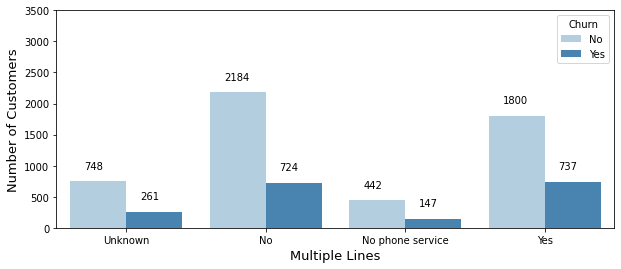

In [ ]:
# Multiple Lines
df_MultipleLines = pd.DataFrame(df_telco['MultipleLines'].value_counts())
df_MultipleLines['Percent'] = [round(i*100/sum(df_MultipleLines.MultipleLines), 1) for i in df_MultipleLines.MultipleLines]

df_MultipleLines_churn = pd.DataFrame(df_telco.MultipleLines[(df_telco['Churn'] == 'Yes')].value_counts())
df_MultipleLines['Churn'] = df_MultipleLines_churn.MultipleLines
df_MultipleLines['Churn %'] = [round(i*100/sum(df_MultipleLines_churn.MultipleLines), 1) for i in df_MultipleLines_churn.MultipleLines]

df_MultipleLines_notChurn = pd.DataFrame(df_telco.MultipleLines[(df_telco['Churn'] == 'No')].value_counts())
df_MultipleLines['Not Churn'] = df_MultipleLines_notChurn.MultipleLines
df_MultipleLines['Not Churn %'] = [round(i*100/sum(df_MultipleLines_notChurn.MultipleLines), 1) for i in df_MultipleLines_notChurn.MultipleLines]

print(df_MultipleLines)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='MultipleLines', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Multiple Lines', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 3500)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, can be seen that the most customers using multiple lines
* From 7043 customers, 41.3% using multiple lines, 36% not using multiple lines, 14.3% unknown using multiple lines or not and 8.4% not using phone service
* For customers who churn by multiple lines, 39.4% not using multiple line, 38.7% using multiple lines, 14% unknown using multiple lines or not and 7.9% not using phone service
* For customers who not churn by multiple lines, 42.2% not using multiple line, 34.8% using multiple lines, 14.5% unknown using multiple lines or not and 8.5% not using phone service


             InternetService  Percent  Churn  Churn %  Not Churn  Not Churn %
Fiber optic             2621     37.2   1109     59.3       1512         32.7
DSL                     2092     29.7    401     21.5       1691         29.2
No                      1321     18.8     98     14.0       1223         23.6
Unknown                 1009     14.3    261      5.2        748         14.5


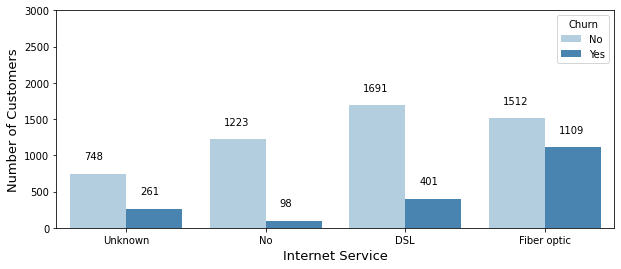

In [ ]:
# Internet Service
df_InternetService = pd.DataFrame(df_telco['InternetService'].value_counts())
df_InternetService['Percent'] = [round(i*100/sum(df_InternetService.InternetService), 1) for i in df_InternetService.InternetService]

df_InternetService_churn = pd.DataFrame(df_telco.InternetService[(df_telco['Churn'] == 'Yes')].value_counts())
df_InternetService['Churn'] = df_InternetService_churn.InternetService
df_InternetService['Churn %'] = [round(i*100/sum(df_InternetService_churn.InternetService), 1) for i in df_InternetService_churn.InternetService]

df_InternetService_notChurn = pd.DataFrame(df_telco.InternetService[(df_telco['Churn'] == 'No')].value_counts())
df_InternetService['Not Churn'] = df_InternetService_notChurn.InternetService
df_InternetService['Not Churn %'] = [round(i*100/sum(df_InternetService_notChurn.InternetService), 1) for i in df_InternetService_notChurn.InternetService]

print(df_InternetService)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='InternetService', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Internet Service', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 3000)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, can be seen that the most customers using fiber optic to their internet services
* From 7043 customers, 37.2% using fiber optic, 29.7% using DSL, 18.8% not using internet services and 14.3% unknown using internet services or not
* For customers who churn by internet services, 59.3% using fiber optic, 21.5% using DSL, 14% not using internet services and 5.2% unknown using internet services or not
* For customers who not churn by internet services, 32.7% using fiber optic, 29.2% using DSL, 23.6% not using internet services and 14.5% unknown using internet services or not


                     OnlineSecurity  Percent  Churn  Churn %  Not Churn  \
No                             2993     42.5   1259     67.4       1734   
Yes                            1720     24.4    251     14.0       1469   
No internet service            1321     18.8     98     13.4       1223   
Unknown                        1009     14.3    261      5.2        748   

                     Not Churn %  
No                          33.5  
Yes                         28.4  
No internet service         23.6  
Unknown                     14.5  


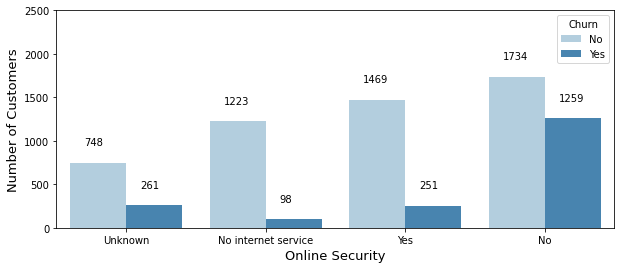

In [ ]:
# Online Security
df_OnlineSecurity = pd.DataFrame(df_telco['OnlineSecurity'].value_counts())
df_OnlineSecurity['Percent'] = [round(i*100/sum(df_OnlineSecurity.OnlineSecurity), 1) for i in df_OnlineSecurity.OnlineSecurity]

df_OnlineSecurity_churn = pd.DataFrame(df_telco.OnlineSecurity[(df_telco['Churn'] == 'Yes')].value_counts())
df_OnlineSecurity['Churn'] = df_OnlineSecurity_churn.OnlineSecurity
df_OnlineSecurity['Churn %'] = [round(i*100/sum(df_OnlineSecurity_churn.OnlineSecurity), 1) for i in df_OnlineSecurity_churn.OnlineSecurity]

df_OnlineSecurity_notChurn = pd.DataFrame(df_telco.OnlineSecurity[(df_telco['Churn'] == 'No')].value_counts())
df_OnlineSecurity['Not Churn'] = df_OnlineSecurity_notChurn.OnlineSecurity
df_OnlineSecurity['Not Churn %'] = [round(i*100/sum(df_OnlineSecurity_notChurn.OnlineSecurity), 1) for i in df_OnlineSecurity_notChurn.OnlineSecurity]

print(df_OnlineSecurity)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='OnlineSecurity', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Online Security', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 2500)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, can be seen that the most customers not using online security
* From 7043 customers, 42.5% not using online security, 24.4% using online security, 18.8% not using internet services and 14.3% unknown using online security or not
* For customers who churn by online security, 67.4% not using online security, 14% using online security, 13.4% not using internet services and 5.2% unknown using online security or not
* For customers who not churn by internet services, 33.5% not using online security, 28.4% using online security, 23.6% not using internet services and 14.5% unknown using online security or not


                     OnlineBackup  Percent  Churn  Churn %  Not Churn  \
No                           2643     37.5   1067     57.1       1576   
Yes                          2070     29.4    443     23.7       1627   
No internet service          1321     18.8     98     14.0       1223   
Unknown                      1009     14.3    261      5.2        748   

                     Not Churn %  
No                          31.4  
Yes                         30.5  
No internet service         23.6  
Unknown                     14.5  


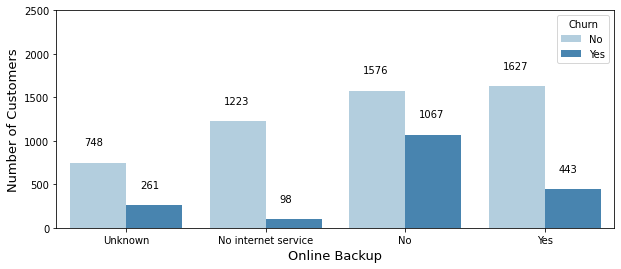

In [ ]:
# Online Backup
df_OnlineBackup = pd.DataFrame(df_telco['OnlineBackup'].value_counts())
df_OnlineBackup['Percent'] = [round(i*100/sum(df_OnlineBackup.OnlineBackup), 1) for i in df_OnlineBackup.OnlineBackup]

df_OnlineBackup_churn = pd.DataFrame(df_telco.OnlineBackup[(df_telco['Churn'] == 'Yes')].value_counts())
df_OnlineBackup['Churn'] = df_OnlineBackup_churn.OnlineBackup
df_OnlineBackup['Churn %'] = [round(i*100/sum(df_OnlineBackup_churn.OnlineBackup), 1) for i in df_OnlineBackup_churn.OnlineBackup]

df_OnlineBackup_notChurn = pd.DataFrame(df_telco.OnlineBackup[(df_telco['Churn'] == 'No')].value_counts())
df_OnlineBackup['Not Churn'] = df_OnlineBackup_notChurn.OnlineBackup
df_OnlineBackup['Not Churn %'] = [round(i*100/sum(df_OnlineBackup_notChurn.OnlineBackup), 1) for i in df_OnlineBackup_notChurn.OnlineBackup]

print(df_OnlineBackup)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='OnlineBackup', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Online Backup', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 2500)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, there are 4 category of customer based on Online Backup services.
* From 7043 customers, customers with who take online backup are 2070 customers or 29.4%. Cusstomer who don't take online backup are 2643 or 37.5%. Customers who don't have internet service are 1321 or 18.8%. Customers with unknown data are 1009 or 14.3%.
* For customers who churn, most of them don't take Online Backup service. We can see that from the chart, where there are 1067 or 57.1% customers.
* Then for customers who not churn most of them take Online Backup service. we can see from the chart, where there are 1627 or 31.4% customers. 

                     DeviceProtection  Percent  Churn  Churn %  Not Churn  \
No                               2643     37.5   1043     55.8       1600   
Yes                              2070     29.4    467     25.0       1603   
No internet service              1321     18.8     98     14.0       1223   
Unknown                          1009     14.3    261      5.2        748   

                     Not Churn %  
No                          31.0  
Yes                         30.9  
No internet service         23.6  
Unknown                     14.5  


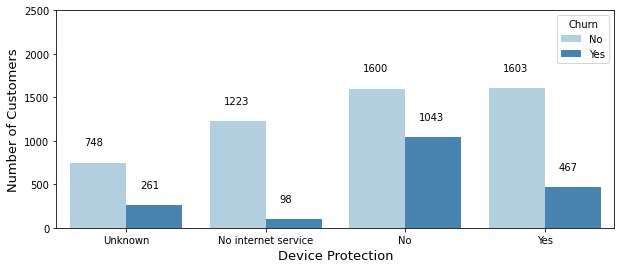

In [ ]:
# Device Protection
df_DeviceProtection = pd.DataFrame(df_telco['DeviceProtection'].value_counts())
df_DeviceProtection['Percent'] = [round(i*100/sum(df_DeviceProtection.DeviceProtection), 1) for i in df_DeviceProtection.DeviceProtection]

df_DeviceProtection_churn = pd.DataFrame(df_telco.DeviceProtection[(df_telco['Churn'] == 'Yes')].value_counts())
df_DeviceProtection['Churn'] = df_DeviceProtection_churn.DeviceProtection
df_DeviceProtection['Churn %'] = [round(i*100/sum(df_DeviceProtection_churn.DeviceProtection), 1) for i in df_DeviceProtection_churn.DeviceProtection]

df_DeviceProtection_notChurn = pd.DataFrame(df_telco.DeviceProtection[(df_telco['Churn'] == 'No')].value_counts())
df_DeviceProtection['Not Churn'] = df_DeviceProtection_notChurn.DeviceProtection
df_DeviceProtection['Not Churn %'] = [round(i*100/sum(df_DeviceProtection_notChurn.DeviceProtection), 1) for i in df_DeviceProtection_notChurn.DeviceProtection]

print(df_DeviceProtection)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='DeviceProtection', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Device Protection', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 2500)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, there are 4 category of customer based on Device Protection services.
* From 7043 customers, customers with who take Device Protection are 2070 customers or 29.4%. Cusstomer who don't take Device Protection are 2643 or 37.5%. Customers who don't have internet service are 1321 or 18.8%. Customers with unknown data are 1009 or 14.3%.
* For customers who churn, most of them don't take Device Protection service. We can see that from the chart, where there are 1043 or 55.8% customers.
* Then for customers who not churn most of them take Device Protection service. we can see from the chart, where there are 1603 or 31.0% customers. 

                     TechSupport  Percent  Churn  Churn %  Not Churn  \
No                          2973     42.2   1235     66.1       1738   
Yes                         1740     24.7    275     14.7       1465   
No internet service         1321     18.8     98     14.0       1223   
Unknown                     1009     14.3    261      5.2        748   

                     Not Churn %  
No                          33.6  
Yes                         28.3  
No internet service         23.6  
Unknown                     14.5  


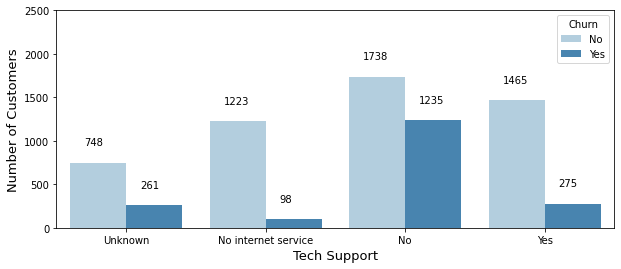

In [ ]:
# Tech Support
df_TechSupport = pd.DataFrame(df_telco['TechSupport'].value_counts())
df_TechSupport['Percent'] = [round(i*100/sum(df_TechSupport.TechSupport), 1) for i in df_TechSupport.TechSupport]

df_TechSupport_churn = pd.DataFrame(df_telco.TechSupport[(df_telco['Churn'] == 'Yes')].value_counts())
df_TechSupport['Churn'] = df_TechSupport_churn.TechSupport
df_TechSupport['Churn %'] = [round(i*100/sum(df_TechSupport_churn.TechSupport), 1) for i in df_TechSupport_churn.TechSupport]

df_TechSupport_notChurn = pd.DataFrame(df_telco.TechSupport[(df_telco['Churn'] == 'No')].value_counts())
df_TechSupport['Not Churn'] = df_TechSupport_notChurn.TechSupport
df_TechSupport['Not Churn %'] = [round(i*100/sum(df_TechSupport_notChurn.TechSupport), 1) for i in df_TechSupport_notChurn.TechSupport]

print(df_TechSupport)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='TechSupport', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Tech Support', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 2500)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, there are 4 category of customer based on Tech Support services.
* From 7043 customers, customers with who take Tech Support are 1749 customers or 24.7%. Cusstomer who don't take Tech Support are 2973 or 42.2%. Customers who don't have internet service are 1321 or 18.8%. Customers with unknown data are 1009 or 14.3%.
* For customers who churn, most of them don't take Tech Support service. We can see that from the chart, where there are 1235 or 66.1% customers.
* Then for customers who not churn most of them don't take Tech Support service. we can see from the chart, where there are 1738 or 33.6% customers. 

                     StreamingTV  Percent  Churn  Churn %  Not Churn  \
No                          2403     34.1    802     42.9       1601   
Yes                         2310     32.8    708     37.9       1602   
No internet service         1321     18.8     98     14.0       1223   
Unknown                     1009     14.3    261      5.2        748   

                     Not Churn %  
No                          31.0  
Yes                         30.9  
No internet service         23.6  
Unknown                     14.5  


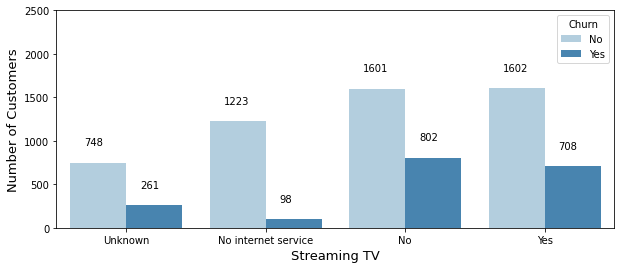

In [ ]:
# Streaming TV
df_StreamingTV = pd.DataFrame(df_telco['StreamingTV'].value_counts())
df_StreamingTV['Percent'] = [round(i*100/sum(df_StreamingTV.StreamingTV), 1) for i in df_StreamingTV.StreamingTV]

df_StreamingTV_churn = pd.DataFrame(df_telco.StreamingTV[(df_telco['Churn'] == 'Yes')].value_counts())
df_StreamingTV['Churn'] = df_StreamingTV_churn.StreamingTV
df_StreamingTV['Churn %'] = [round(i*100/sum(df_StreamingTV_churn.StreamingTV), 1) for i in df_StreamingTV_churn.StreamingTV]

df_StreamingTV_notChurn = pd.DataFrame(df_telco.StreamingTV[(df_telco['Churn'] == 'No')].value_counts())
df_StreamingTV['Not Churn'] = df_StreamingTV_notChurn.StreamingTV
df_StreamingTV['Not Churn %'] = [round(i*100/sum(df_StreamingTV_notChurn.StreamingTV), 1) for i in df_StreamingTV_notChurn.StreamingTV]

print(df_StreamingTV)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='StreamingTV', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Streaming TV', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 2500)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, there are 4 category of customer based on Streaming TV services.
* From 7043 customers, customers with who take Streaming TV are 2310 customers or 32.8%. Cusstomer who don't take Streaming TV are 2403 or 34.1%. Customers who don't have internet service are 1321 or 18.8%. Customers with unknown data are 1009 or 14.3%.
* For customers who churn, most of them don't take Streaming TV service. We can see that from the chart, where there are 802 or 42.9% customers.
* Then for customers who not churn most of them take Streaming TV service. we can see from the chart, where there are 1602 or 31% customers. 

                     StreamingMovies  Percent  Churn  Churn %  Not Churn  \
No                              2394     34.0    813     43.5       1581   
Yes                             2319     32.9    697     37.3       1622   
No internet service             1321     18.8     98     14.0       1223   
Unknown                         1009     14.3    261      5.2        748   

                     Not Churn %  
No                          31.3  
Yes                         30.6  
No internet service         23.6  
Unknown                     14.5  


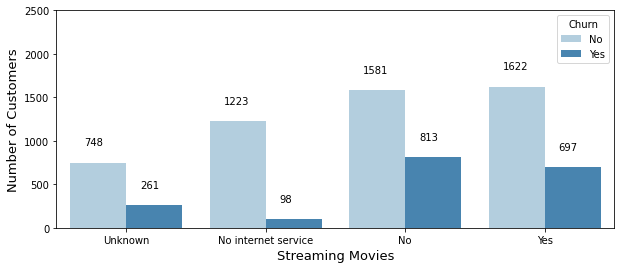

In [ ]:
# Streaming Movies
df_StreamingMovies = pd.DataFrame(df_telco['StreamingMovies'].value_counts())
df_StreamingMovies['Percent'] = [round(i*100/sum(df_StreamingMovies.StreamingMovies), 1) for i in df_StreamingMovies.StreamingMovies]

df_StreamingMovies_churn = pd.DataFrame(df_telco.StreamingMovies[(df_telco['Churn'] == 'Yes')].value_counts())
df_StreamingMovies['Churn'] = df_StreamingMovies_churn.StreamingMovies
df_StreamingMovies['Churn %'] = [round(i*100/sum(df_StreamingMovies_churn.StreamingMovies), 1) for i in df_StreamingMovies_churn.StreamingMovies]

df_StreamingMovies_notChurn = pd.DataFrame(df_telco.StreamingMovies[(df_telco['Churn'] == 'No')].value_counts())
df_StreamingMovies['Not Churn'] = df_StreamingMovies_notChurn.StreamingMovies
df_StreamingMovies['Not Churn %'] = [round(i*100/sum(df_StreamingMovies_notChurn.StreamingMovies), 1) for i in df_StreamingMovies_notChurn.StreamingMovies]

print(df_StreamingMovies)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='StreamingMovies', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Streaming Movies', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 2500)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, it can be seen that there are more non-churn customers who don’t stream movies than churn customers.
* From 7043 customers, 34% don’t stream movies, 32.9% streaming movies, 18.8% don’t have internet service, and 14.3% who are not known streaming movies or not.
* For churn customers by StreamingMovies, 43.5% don’t stream movies, 37.3% streaming movies, 14% don’t have internet service, and 5.2% who are not known streaming movies or not.
* For non-churn customers by StreamingMovies, 31.3% don’t stream movies, 30.6% streaming movies, 23.6% don’t have internet service, and 14.5% who are not known streaming movies or not.


                Contract  Percent  Churn  Churn %  Not Churn  Not Churn %
Month-to-month      3875     55.0   1655     88.6       2220         42.9
Two year            1695     24.1     48      8.9       1647         31.8
One year            1473     20.9    166      2.6       1307         25.3


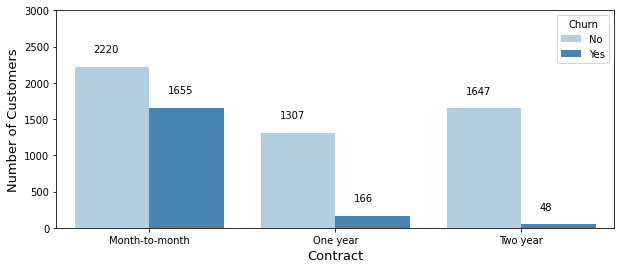

In [ ]:
# Contract
df_Contract = pd.DataFrame(df_telco['Contract'].value_counts())
df_Contract['Percent'] = [round(i*100/sum(df_Contract.Contract), 1) for i in df_Contract.Contract]

df_Contract_churn = pd.DataFrame(df_telco.Contract[(df_telco['Churn'] == 'Yes')].value_counts())
df_Contract['Churn'] = df_Contract_churn.Contract
df_Contract['Churn %'] = [round(i*100/sum(df_Contract_churn.Contract), 1) for i in df_Contract_churn.Contract]

df_Contract_notChurn = pd.DataFrame(df_telco.Contract[(df_telco['Churn'] == 'No')].value_counts())
df_Contract['Not Churn'] = df_Contract_notChurn.Contract
df_Contract['Not Churn %'] = [round(i*100/sum(df_Contract_notChurn.Contract), 1) for i in df_Contract_notChurn.Contract]

print(df_Contract)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='Contract', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Contract', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 3000)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, it can be seen that there are more non-churn customers who have current contract type than churn customers.
* From 7043 customers, 55% choose month-to-month type, 20.9% choose one year type, and 24.1% choose two year type.
* For churn customers by Contract, 88.6% choose month-to-month type, 2.6% choose one year type, and 8.9% choose two year type.
* For non-churn customers by Contract, 42.9% choose month-to-month type, 25.3% choose one year type, and 31.8% choose two year type.


     PaperlessBilling  Percent  Churn  Churn %  Not Churn  Not Churn %
Yes              4171     59.2   1400     74.9       2771         53.6
No               2872     40.8    469     25.1       2403         46.4


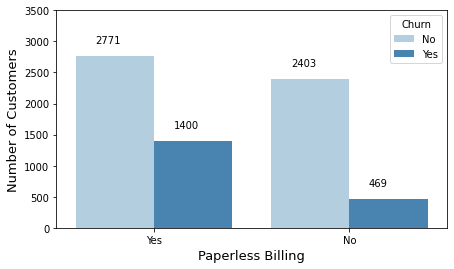

In [ ]:
# PaperlessBilling
df_PaperlessBilling = pd.DataFrame(df_telco['PaperlessBilling'].value_counts())
df_PaperlessBilling['Percent'] = [round(i*100/sum(df_PaperlessBilling.PaperlessBilling), 1) for i in df_PaperlessBilling.PaperlessBilling]

df_PaperlessBilling_churn = pd.DataFrame(df_telco.PaperlessBilling[(df_telco['Churn'] == 'Yes')].value_counts())
df_PaperlessBilling['Churn'] = df_PaperlessBilling_churn.PaperlessBilling
df_PaperlessBilling['Churn %'] = [round(i*100/sum(df_PaperlessBilling_churn.PaperlessBilling), 1) for i in df_PaperlessBilling_churn.PaperlessBilling]

df_PaperlessBilling_notChurn = pd.DataFrame(df_telco.PaperlessBilling[(df_telco['Churn'] == 'No')].value_counts())
df_PaperlessBilling['Not Churn'] = df_PaperlessBilling_notChurn.PaperlessBilling
df_PaperlessBilling['Not Churn %'] = [round(i*100/sum(df_PaperlessBilling_notChurn.PaperlessBilling), 1) for i in df_PaperlessBilling_notChurn.PaperlessBilling]

print(df_PaperlessBilling)

plt.figure(figsize=(7,4))
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Paperless Billing', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 3500)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, it can be seen that there are more non-churn customers who have paperless billing than churn customers.
* From 7043 customers, 59.2% who have paperless billing and 40.8% who haven’t paperless billing.
* For churn customers by PaperlessBilling, 74.9% have paperless billing and 25.1% haven’t paperless billing.
* For non-churn customers by PaperlessBilling, 53.6% have paperless billing and 46.4% haven’t paperless billing.


                           PaymentMethod  Percent  Churn  Churn %  Not Churn  \
Electronic check                    2365     33.6   1071     57.3       1294   
Mailed check                        1612     22.9    308     16.5       1304   
Bank transfer (automatic)           1544     21.9    258     13.8       1286   
Credit card (automatic)             1522     21.6    232     12.4       1290   

                           Not Churn %  
Electronic check                  25.2  
Mailed check                      25.0  
Bank transfer (automatic)         24.9  
Credit card (automatic)           24.9  


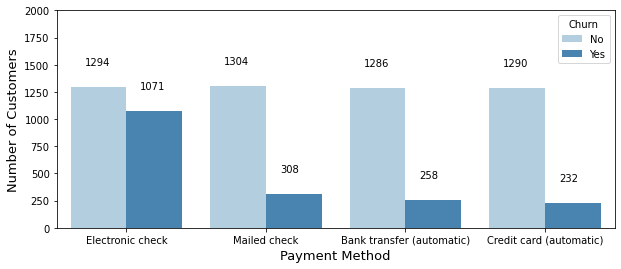

In [ ]:
# Payment Method
df_PaymentMethod = pd.DataFrame(df_telco['PaymentMethod'].value_counts())
df_PaymentMethod['Percent'] = [round(i*100/sum(df_PaymentMethod.PaymentMethod), 1) for i in df_PaymentMethod.PaymentMethod]

df_PaymentMethod_churn = pd.DataFrame(df_telco.PaymentMethod[(df_telco['Churn'] == 'Yes')].value_counts())
df_PaymentMethod['Churn'] = df_PaymentMethod_churn.PaymentMethod
df_PaymentMethod['Churn %'] = [round(i*100/sum(df_PaymentMethod_churn.PaymentMethod), 1) for i in df_PaymentMethod_churn.PaymentMethod]

df_PaymentMethod_notChurn = pd.DataFrame(df_telco.PaymentMethod[(df_telco['Churn'] == 'No')].value_counts())
df_PaymentMethod['Not Churn'] = df_PaymentMethod_notChurn.PaymentMethod
df_PaymentMethod['Not Churn %'] = [round(i*100/sum(df_PaymentMethod_notChurn.PaymentMethod), 1) for i in df_PaymentMethod_notChurn.PaymentMethod]

print(df_PaymentMethod)

plt.figure(figsize=(10,4))
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=df_telco, palette='Blues')
plt.xlabel('Payment Method', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.ylim(0, 2000)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+200), fontsize=10)

* From the chart above, it can be seen that there are more non-churn customers who use payment methods than churn customers.
* From 7043 customers, 33.6% use electronic check, 22.9% use mailed check, 21.9% use bank transfer (automatic), and 21.6% use credit card (automatic).
* For churn customers by PaymentMethod, 57.3% use electronic check, 16.5% use mailed check, 13.8% use bank transfer (automatic), and 12.4% use credit card (automatic).
* For not churn customers by PaymentMethod, 25.2% use electronic check, 25% use mailed check, 24.9% use bank transfer (automatic), and 24.9% use credit card (automatic).


#### Know how many customers that churn and not churn based on spending their money every month and total spending.

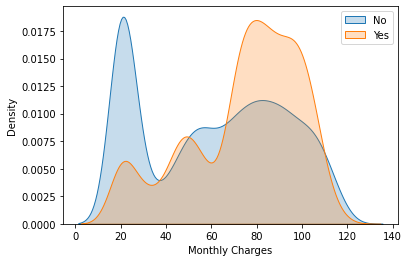

In [ ]:
# Monthly Charges
ax_monthly = sns.kdeplot(df_telco.MonthlyCharges[(df_telco['Churn'] == 'No')], shade='True')
ax_monthly = sns.kdeplot(df_telco.MonthlyCharges[(df_telco['Churn'] == 'Yes')], shade='True', ax=ax_monthly)

ax_monthly.legend(['No', 'Yes'], loc='upper right')
ax_monthly.set_xlabel('Monthly Charges');

* From the chart above, can be seen that the non-churn customer has the highest density, the density is above 0.0175 in the low range of monthly charges amount.
* The churn customer highest density is above 0.0175  in the high range of monthly charges amount.
* The non-churn customer monthly charges density peak the highest at the lower amount and medium density at the mid to high amount.
* The churn customer monthly charges amount density peak at middle to high amount but low density at low amount.


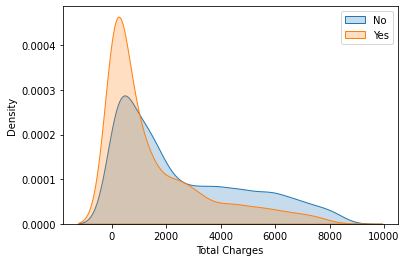

In [ ]:
# Total Charges
ax_total = sns.kdeplot(df_telco.TotalCharges[(df_telco['Churn'] == 'No')], shade='True')
ax_total = sns.kdeplot(df_telco.TotalCharges[(df_telco['Churn'] == 'Yes')], shade='True', ax=ax_total)

ax_total.legend(['No', 'Yes'], loc='upper right')
ax_total.set_xlabel('Total Charges');

* From the chart above, can be seen that the churn customer has the highest density, the density is  above 0.0004 in the low range of total charges amount.
* The non-churn customer highest density is below 0.0003 in the low range of total charges amount.
* The non-churn customer total charges amount density peak is lower than the churn customer.
* The churn customer total harges amount density peak is highest than non-churn customer.


#### Know how long customers that churn and not churn based on ong their tenure.

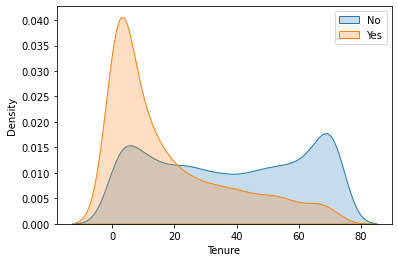

In [ ]:
# Tenure
ax_tenure = sns.kdeplot(df_telco.tenure[(df_telco['Churn'] == 'No')], shade='True')
ax_tenure = sns.kdeplot(df_telco.tenure[(df_telco['Churn'] == 'Yes')], shade='True', ax=ax_tenure)

ax_tenure.legend(['No', 'Yes'], loc='upper right')
ax_tenure.set_xlabel('Tenure');

* Customers who churn from the long of tenure from 0 - 20 months with the highest density above 0.040.
* Customers who not churn from the long of tenure from 60 - 80 months with the highest density above 0.015

# Feature Engineering

In [ ]:
data = df_telco.select_dtypes(include=['object']).columns.to_list()
for i in data:
    if i == 'Contract':
        df_telco[i] = df_telco[i].map({'Month-to-month':0,'One year':1,'Two year':2})
    elif i == 'Churn':
        df_telco[i] = df_telco[i].map({'Yes':1,'No':0})
    else:
        column_enc = pd.get_dummies(df_telco[i], prefix=i, drop_first = False)
        df_telco = df_telco.drop([i], axis = 1)
        df_telco = pd.concat([df_telco, column_enc], axis = 1)

In [ ]:
df_telco.head()

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,gender_Unknown,SeniorCitizen_0.0,SeniorCitizen_1.0,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Unknown,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,29.85,29.85,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,34,1,56.95,1889.50,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,2,0,53.85,108.15,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,45,1,42.30,1840.75,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,2,0,70.70,151.65,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
scaler = MinMaxScaler()
df_telco[['tenure']] = scaler.fit_transform(df_telco[['tenure']])
df_telco[['MonthlyCharges']] = scaler.fit_transform(df_telco[['MonthlyCharges']])
df_telco[['TotalCharges']] = scaler.fit_transform(df_telco[['TotalCharges']])

In [ ]:
df_telco.head()

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,gender_Unknown,SeniorCitizen_0.0,SeniorCitizen_1.0,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Unknown,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0,0.115423,0.001275,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0.472222,1,0.385075,0.215867,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0.027778,0,0.354229,0.010310,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0.625000,1,0.239303,0.210241,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0.027778,0,0.521891,0.015330,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0



---



# Preprocessing Model

## Feature Selection


In [ ]:
# drop coloumn that contains multicolinear
df_telco.drop(['TotalCharges'], axis=1, inplace=True)

## Feature Important

In [ ]:
X = df_telco.drop(['Churn'], axis=1)
y = df_telco['Churn']

X.head()

,tenure,Contract,MonthlyCharges,gender_Female,gender_Male,gender_Unknown,SeniorCitizen_0.0,SeniorCitizen_1.0,SeniorCitizen_Unknown,Partner_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Unknown,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0,0.115423,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,0.472222,1,0.385075,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0.027778,0,0.354229,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0.625000,1,0.239303,0,0,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0.027778,0,0.521891,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


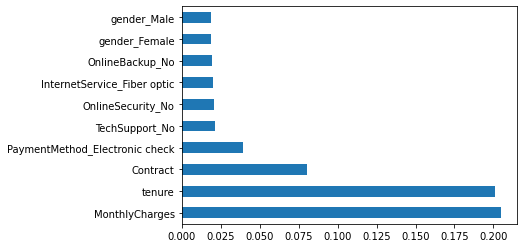

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

From the chart above we can see the top 10 feature that affect the model most. There are tenure, MonthlyCharges, Contract, PaymentMethod_Electronic check, OnlineSecurity_No, TechSupport_No, InternetService_Fiber optic, gender_Female, gender_Male, and OnlineBackup_No.

---



# Modeling Data : Logistic Regression
Logistic Regression is a classification technique used in machine learning. It uses a logistic function to model the dependent variable. The dependent variable is dichotomous in nature, in this case is customer who churn or not. We are using deafult threshold in this model to classify the churn customer and not churn customer.

In [ ]:
# fitting training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predict the result
y_pred = model.predict(X_test)



---



# Evaluation : Confusion Matrix
- A confusion matrix is a technique for summarizing the performance of a classification algorithm.

- Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.

- Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.


              precision    recall  f1-score   support

       Churn       0.86      0.91      0.88      1036
   Not_Churn       0.69      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



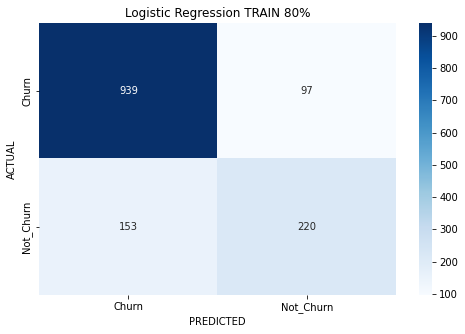

In [ ]:
cm_model = confusion_matrix(y_test, y_pred)

labels = ['Churn', 'Not_Churn']

print(classification_report(y_test, y_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

### Classification Report
- From the table above we can see the precision for churn variable is 0.86 and not_churn variable is 0.69
- From the table above we can see the recall for churn variable is 0.91 and not_churn variable is 0.59
- From the table above we can  see the f1- score for churn variable is 0.88 and not_churn variable is 0.64
- From the table above we can see the accuracy for this model 0.82

### Confusion Matrix
There are 4 category in this matrix:
- True Positive, the number of true positive is 939
- True Negative, the number of true negative is 220
- False Negative, the number of false negative is 97
- False Positive, the number of false positive is 153

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Accuracy score of training data
print(accuracy_score(y_train,y_pred_train))

0.7997870074547391


In [ ]:
print(accuracy_score(y_test,y_pred_test))

0.8225691980127751


## AUC & RUC
AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_proba_train = model.predict_proba(X_train)[:,1]
y_proba_test = model.predict_proba(X_test)[:,1]
cm_train = confusion_matrix(y_train,y_pred_train)
cm_test = confusion_matrix(y_test,y_pred_test)

In [ ]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

In [ ]:
# True Positive
tp_train, tp_test = cm_train[1][1], cm_test[1][1]
# True Negative
tn_train, tn_test = cm_train[0][0], cm_test[0][0]
# False Positive
fp_train, fp_test = cm_train[1][0], cm_test[1][0]
# False Negative
fn_train, fn_test = cm_train[0][1], cm_test[0][1]

In [ ]:
# Overall, how often is the classifier correct?
accuracy_train, accuracy_test = ((tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)), (
            (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test))
# When it's actually yes, how often does it predict yes?
recall_train, recall_test = (tp_train / (tp_train + fp_train)), (tp_test / (tp_test + fp_test))
# When it's actually no, how often does it predict no?
specificity_train, specificity_test = (tn_train / (tn_train + fn_train)), (tn_test / (tn_test + fn_test))
# When it predicts yes, how often is it correct?
precision_train, precision_test = (tp_train / (tp_train + fn_train)), (tp_test / (tp_test + fn_test))
# F1 Score
f1_score_train, f1_score_test = (2 * (precision_train * recall_train) / (precision_train + recall_train)), (
            2 * (precision_test * recall_test) / (precision_test + recall_test))

In [ ]:
# Print all the evaluation metrics
print('\nTrain Confusion Matrix')
print(cm_train)
print('Test Confusion Matrix')
print(cm_test)
print('\nArea Under Curve')
print('AUC train & test        : %.2f%%' % (roc_auc_train * 100), '&', '%.2f%%' % (roc_auc_test * 100))
print('\nConfusion Matrix Evaluation')
print('Accuracy train & test   : %.2f%%' % (accuracy_train * 100), '&', '%.2f%%' % (accuracy_test * 100))
print('Recall train & test     : %.2f%%' % (recall_train * 100), '&', '%.2f%%' % (recall_test * 100))
print('Specificity train & test: %.2f%%' % (specificity_train * 100), '&', '%.2f%%' % (specificity_test * 100))
print('Precision train & test  : %.2f%%' % (precision_train * 100), '&', '%.2f%%' % (precision_test * 100))
print('F1 Score train & test   : %.2f%%' % (f1_score_train * 100), '&', '%.2f%%' % (f1_score_test * 100))
print('Log Loss train & test   :', round(log_loss(y_train, y_pred_train), 4), '&',
          round(log_loss(y_test, y_pred_test), 4))


Train Confusion Matrix
[[3717  421]
 [ 707  789]]
Test Confusion Matrix
[[939  97]
 [153 220]]

Area Under Curve
AUC train & test        : 83.96% & 86.07%

Confusion Matrix Evaluation
Accuracy train & test   : 79.98% & 82.26%
Recall train & test     : 52.74% & 58.98%
Specificity train & test: 89.83% & 90.64%
Precision train & test  : 65.21% & 69.40%
F1 Score train & test   : 58.31% & 63.77%
Log Loss train & test   : 6.9152 & 6.1283


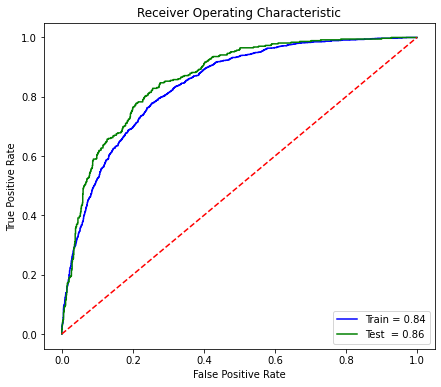

In [ ]:
#create plot of ROC_AUC
plt.figure(figsize=(7, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label='Train = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'g', label='Test  = %0.2f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Building a Model with Cross Validation
Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model.

In [ ]:
model = LogisticRegression()

In [ ]:
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=3)

scores

array([0.79605964, 0.79978701, 0.80138445])

## Hyperparameter Tuning in Logistic Regression
Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.

In [ ]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parameters = {"penalty": ['l1', 'l2', 'elasticnet', 'none'],
              "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              "n_jobs": [None, -1],
              "max_iter": [10, 100, 1000]
             }

In [ ]:
grid = GridSearchCV(estimator = model, param_grid = parameters, cv=3)

In [ ]:
best_model = grid.fit(X_train, y_train)

# find best param
best_model.best_params_

{'max_iter': 10, 'n_jobs': None, 'penalty': 'l1', 'solver': 'liblinear'}

## Building a Model with Hyperparameter Turning

In [ ]:
# model with best param
model_new = LogisticRegression(max_iter=10, n_jobs=None, penalty='l2', solver='newton-cg')

In [ ]:
train_model_new = model_new.fit(X_train, y_train)

In [ ]:
y_pred_new = model_new.predict(X_test)

              precision    recall  f1-score   support

       Churn       0.86      0.91      0.88      1036
   Not_Churn       0.70      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



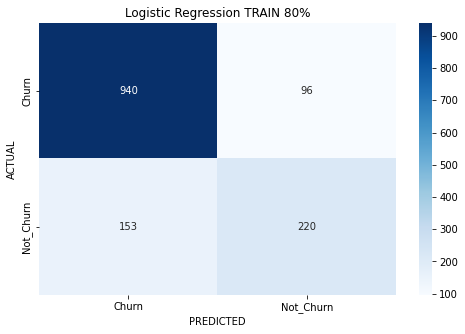

In [ ]:
cm_model = confusion_matrix(y_test, y_pred_new)

labels = ['Churn', 'Not_Churn']

print(classification_report(y_test, y_pred_new, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

### Classification Report
- From the table above we can see the precision for churn variable is 0.86 and not_churn variable is 0.70
- From the table above we can see the recall for churn variable is 0.91 and not_churn variable is 0.59
- From the table above we can  see the f1- score for churn variable is 0.88 and not_churn variable is 0.64
- From the table above we can see the accuracy for this model 0.82

### Confusion Matrix
There are 4 category in this matrix:
- True Positive, the number of true positive is 940
- True Negative, the number of true negative is 220
- False Negative, the number of false negative is 96
- False Positive, the number of false positive is 153

In [ ]:
# Accuracy score of training data
print(accuracy_score(y_train,y_pred_train))

0.7997870074547391


In [ ]:
# Accuracy score of test data
print(accuracy_score(y_test,y_pred_new))

0.8232789212207239


## Oversampling with SMOTE
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

In [ ]:
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

# Model oversampled
model_sm = LogisticRegression()
model_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [ ]:
y_pred_sm = model_sm.predict(X_test)

              precision    recall  f1-score   support

       Churn       0.89      0.83      0.86      1036
   Not_Churn       0.60      0.71      0.65       373

    accuracy                           0.80      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.80      0.80      1409



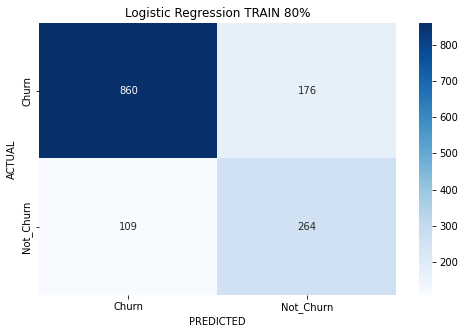

In [ ]:
cm_model = confusion_matrix(y_test, y_pred_sm)

labels = ['Churn', 'Not_Churn']

print(classification_report(y_test, y_pred_sm, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

### Classification Report
- From the table above we can see the precision for churn variable is 0.89 and not_churn variable is 0.60
- From the table above we can see the recall for churn variable is 0.83 and not_churn variable is 0.71
- From the table above we can  see the f1- score for churn variable is 0.86 and not_churn variable is 0.65
- From the table above we can see the accuracy for this model 0.80

### Confusion Matrix
There are 4 category in this matrix:
- True Positive, the number of true positive is 860
- True Negative, the number of true negative is 264
- False Negative, the number of false negative is 176
- False Positive, the number of false positive is 109

In [ ]:
y_pred_train_sm = model_sm.predict(X_train_sm)
y_pred_test_sm = model_sm.predict(X_test)

In [ ]:
# Accuracy score of training data
print(accuracy_score(y_train_sm,y_pred_train_sm))

0.833615273078782


In [ ]:
print(accuracy_score(y_test,y_pred_test_sm))

0.7977288857345636


From the accuracy test above we can see the accurcay for train data is increasing, but for the test data is decreasing. So we can conclude that using this oversampling method cauused overvitting to the model.


---



# Result



**How many customers that churn and not churn ?**
* From the chart above, can be seen that most customers are non-churn
* From 7043 customers, 73.46% are non-churn with 5174 customer and 26.6% are churn with 1869 customer.

**How many customers that churn and not churn based on gender, senior citizen, have partner and dependents ?**
* Customers who churn by gender for male 43.1%, female 42.9% and unknown gender the customer 14%. Then for customers who not churn by gender, 43.3% are male, 42.3% female and the unknown gender the customers 14%.
* Customers who churn by senior citizen for 64% not senior citizen, 14% senior citizen and 22% unknown senior citizen or not. Customers who not churn by senior citizen for 74.6% not senior citizen, 10.9% senior citizen and 14.5% unknown senior citizen or not.
* Customers who churn by partner for 55.2% haven't partner, 30.8% has partner and 14% unknown have partner or not. Then for customers who not churn by partner for 45.4% haven't partner, 40.2% has partner and 14.5% unknown have partner or not.
* Customers who churn by dependents for 70.9% haven't dependents, 15.1% has dependents and 14% unknown have dependents or not. Then for customers who not churn by dependents for 56.3% haven't dependents, 29.3% has dependents and 14.5% unknown have dependents or not.


**How many customers that churn and not churn based on contract, phone service, multiple lines, internet service, online security, online backup, device protection, tech support, streaming tv, streaming movies, paperless billing and payment method ?**
* Customers who churn by phone services, 90.9% using phone services and 9.1% not using phone services. Then customers who not churn by phone services, 90.1% using phone services and 9.9% not using phone services.
* Customers who churn by multiple lines, 39.4% not using multiple line, 38.7% using multiple lines, 14% unknown using multiple lines or not and 7.9% not using phone service. Then customers who not churn by multiple lines, 42.2% not using multiple line, 34.8% using multiple lines, 14.5% unknown using multiple lines or not and 8.5% not using phone service.
* Customers who churn by internet services, 59.3% using fiber optic, 21.5% using DSL, 14% not using internet services and 5.2% unknown using internet services or not. Then customers who not churn by internet services, 32.7% using fiber optic, 29.2% using DSL, 23.6% not using internet services and 14.5% unknown using internet services or not.
* Customers who churn by online security, 67.4% not using online security, 14% using online security, 13.4% not using internet services and 5.2% unknown using online security or not. Customers who not churn by online security, 33.5% not using online security, 28.4% using online security, 23.6% not using internet services and 14.5% unknown using online security or not.
* Customers who churn, most of them don't take Online Backup service. We can see that from the chart, where there are 1067 or 57.1% customers.
Then for customers who not churn most of them take Online Backup service. we can see from the chart, where there are 1627 or 31.4% customers.
* Customers who churn, most of them don't take Device Protection service. We can see that from the chart, where there are 1043 or 55.8% customers.
Then for customers who not churn most of them take Device Protection service. we can see from the chart, where there are 1603 or 31.0% customers.
* Customers who churn, most of them don't take Tech Support service. We can see that from the chart, where there are 1235 or 66.1% customers.
Then for customers who not churn most of them don't take Tech Support service. we can see from the chart, where there are 1738 or 33.6% customers.
* Customers who churn, most of them don't take Streaming TV service. We can see that from the chart, where there are 802 or 42.9% customers.
Then for customers who not churn most of them take Streaming TV service. we can see from the chart, where there are 1602 or 31% customers.
* For churn customers by Streaming Movies, 43.5% don’t stream movies, 37.3% streaming movies, 14% don’t have internet service, and 5.2% who are not known streaming movies or not. For non-churn customers by StreamingMovies, 31.3% don’t stream movies, 30.6% streaming movies, 23.6% don’t have internet service, and 14.5% who are not known streaming movies or not.
* For churn customers by Paperless Billing, 74.9% have paperless billing and 25.1% haven’t paperless billing. For non-churn customers by PaperlessBilling, 53.6% have paperless billing and 46.4% haven’t paperless billing.
* For churn customers by Payment Method, 57.3% use electronic check, 16.5% use mailed check, 13.8% use bank transfer (automatic), and 12.4% use credit card (automatic). For not churn customers by PaymentMethod, 25.2% use electronic check, 25% use mailed check, 24.9% use bank transfer (automatic), and 24.9% use credit card (automatic).
* For churn customers by Contract, 88.6% choose month-to-month type, 2.6% choose one year type, and 8.9% choose two year type. For non-churn customers by Contract, 42.9% choose month-to-month type, 25.3% choose one year type, and 31.8% choose two year type.





**How many customers that churn and not churn based on spending their money every month and total spending ?**
* The churn customer highest density is above 0.0175  in the high range of monthly charges amount. The non-churn customer monthly charges density peak the highest at the lower amount and medium density at the mid to high amount. The churn customer monthly charges amount density peak at middle to high amount but low density at low amount.
* The non-churn customer highest density is below 0.0003 in the low range of total charges amount. The non-churn customer total charges amount density peak is lower than the churn customer. The churn customer total harges amount density peak is highest than non-churn customer.


**How long customers that churn and not churn based on ong their tenure ?**
* Customers who churn from the long of tenure from 0 - 20 months with the highest density above 0.040.
* Customers who not churn from the long of tenure from 60 - 80 months with the highest density above 0.015


**How produce modeling using Machine Learning to predict customers churn ?**
* To produce modeling using machine learning can use Logistic Regression. Logistic Regression is a classification technique used in machine learning. It uses a logistic function to model the dependent variable. The dependent variable is dichotomous in nature, in this case is customer who churn or not. We are using deafult threshold in this model to classify the churn customer and not churn customer.
* After using evaluation using this model we decided to use hyperparameter tunning. Then after evaluating this second model we decided to use the oversampling technique. 
* However, the oversampling technique causes overviting so we choose a model with hyperparameter tunning

---


# Recommendation

- For customer churn : Maintain loyal customers by providing more economical prices and adjusting to the services they usually use.
- For customer by gender : Provide attractive services to customers who are differentiated by gender.
- For customers by senior citizens : The business team can increase the promotion by targeting young-adult citizens or non-senior citizens as their priority segment.
- For subscribers with streaming tv and streaming movies: Offering bundling subscriptions for streaming tv and streaming movies at the same time with more economical price.
- For customer by internet service: Improve internet service for fiber optic.
- For monthly charges : Therefore the team can make loyalty points for every purchase, so customer that purchase can change their points into some reward, so the customer who have points can change it into some rewards just like 1 month free or something else.
- For total charger : Therefore the team can make loyalty level based on total purchase, so customer who have reached some amount can go up to the next level with different benefit in each level.